# Fourier Compression

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import soundfile as sf

## Processing Audio

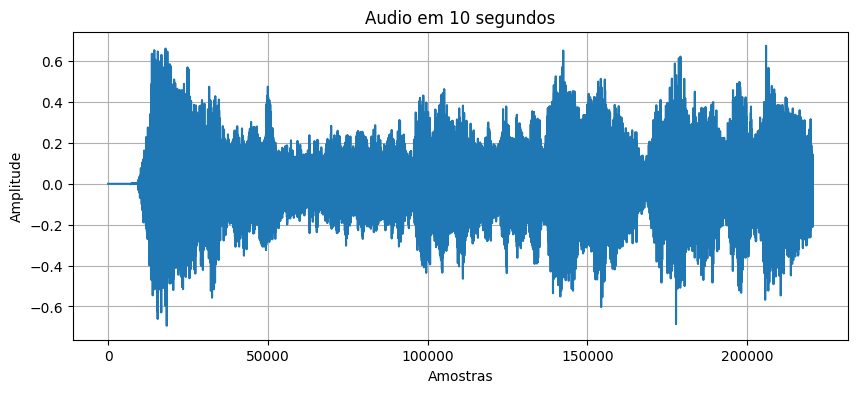

In [5]:
data60, fs = sf.read("audio/StarWars60.wav")
data10 = data60[:10*fs]

plt.figure(figsize=(10, 4))
plt.plot(data10)
plt.title('Audio em 10 segundos')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Plot the Fourier Spectrum

Text(0, 0.5, 'Magnitude')

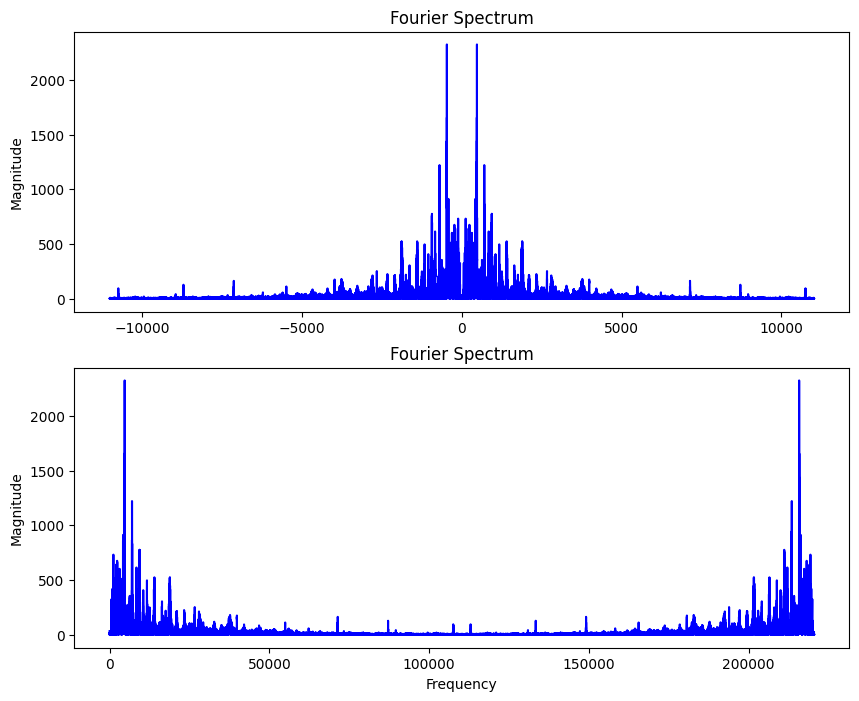

In [6]:

datahat = np.fft.fft(data10)
freqs = np.fft.fftfreq(len(data10), 1/fs)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(freqs, np.abs(datahat), 'b')
axs[1].plot(list(range(datahat.shape[0])), np.abs(datahat), 'b')


axs[0].set_title('Fourier Spectrum')
axs[1].set_title('Fourier Spectrum')

axs[0].set_ylabel('Magnitude')

axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Magnitude')

# Fourier Compression

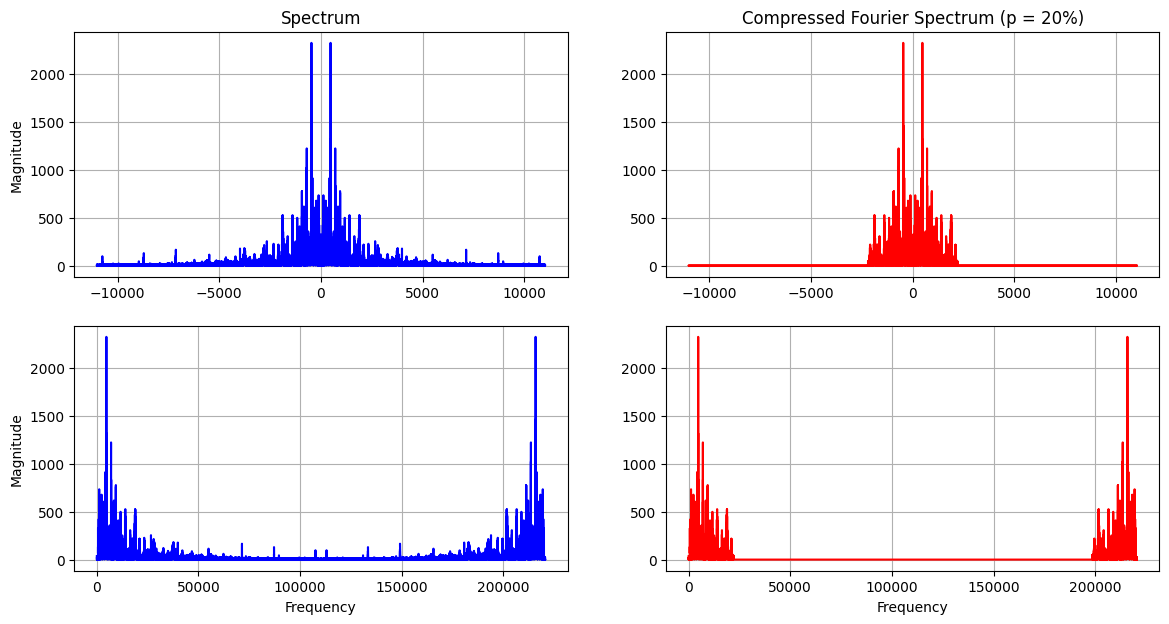

In [7]:
p = 0.2 

num_preserve = int(len(datahat) * (p / 2))
fft_compressed = np.zeros_like(datahat)
fft_compressed[:num_preserve] = datahat[:num_preserve]
fft_compressed[-num_preserve:] = datahat[-num_preserve:]

compressed_data10 = np.fft.ifft(fft_compressed).real

fig, axs = plt.subplots(2, 2, figsize=(14, 7))

# Original 
axs[0,0].plot(freqs, np.abs(datahat), 'b')
axs[0,0].set_title('Spectrum')
axs[0,0].set_ylabel('Magnitude')
axs[0,0].grid()

axs[1,0].plot(list(range(datahat.shape[0])), np.abs(datahat), 'b')
axs[1,0].set_ylabel('Magnitude')
axs[1,0].set_xlabel('Frequency')
axs[1,0].grid()

# Comprimido
axs[0,1].plot(freqs, np.abs(fft_compressed), 'r')
axs[0,1].set_title('Compressed Fourier Spectrum (p = 20%)')
axs[0,1].grid()

axs[1,1].plot(list(range(fft_compressed.shape[0])), np.abs(fft_compressed), 'r')
axs[1,1].set_xlabel('Frequency')
axs[1,1].grid()


When applying compression, only a fraction $p$ of the low frequencies is preserved, while the high frequencies are set to zero. This results in a more reduced spectrum, concentrated in the low frequencies, which saves storage space and simplifies the sound. However, this compression can make the final audio sound more muffled and less detailed due to the loss of clarity and definition of the high frequencies.

# Convolution in Audio Signals with Fourier

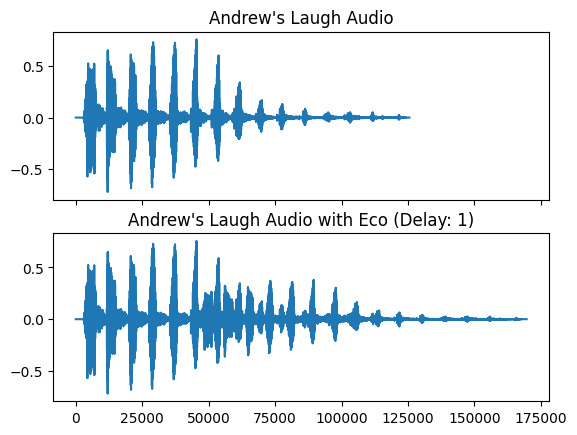

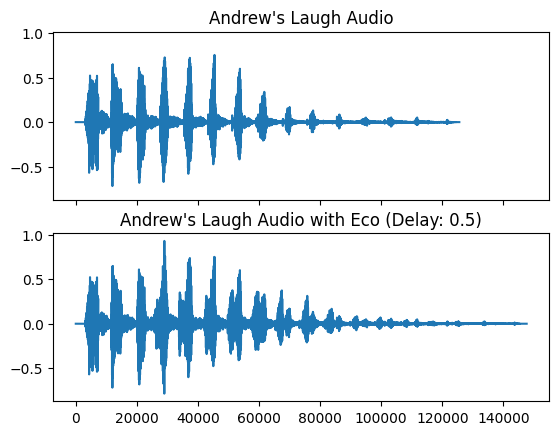

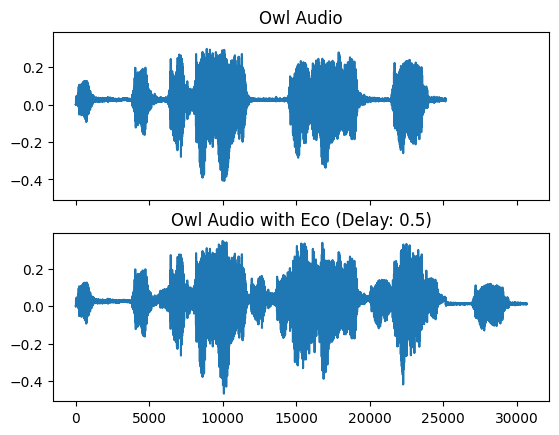

In [13]:
def echo(audio, atraso=0.5, amplitude=0.5,nome=''):
    
    audio_, sample_rate = audio

    delay_samples = int(atraso * sample_rate)
    kernel = np.zeros(delay_samples)
    kernel[0] = 1
    kernel[-1] = amplitude

    echo = np.convolve(audio_, kernel)

    audio_echo = echo, sample_rate

    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

    ax[0].plot(audio[0])
    ax[0].set_title(f"{nome} Audio")

    ax[1].plot(audio_echo[0])
    ax[1].set_title(f"{nome} Audio with Eco (Delay: {atraso})")

    plt.show()

laugh = sf.read("audio/andrewlaughing2-2587.mp3")
echo(laugh, atraso=1, nome= "Andrew's Laugh")
echo(laugh, atraso=0.5, nome= "Andrew's Laugh")

owl = sf.read("audio/Owl.WAV")
echo(owl, atraso=0.5, nome= 'Owl')

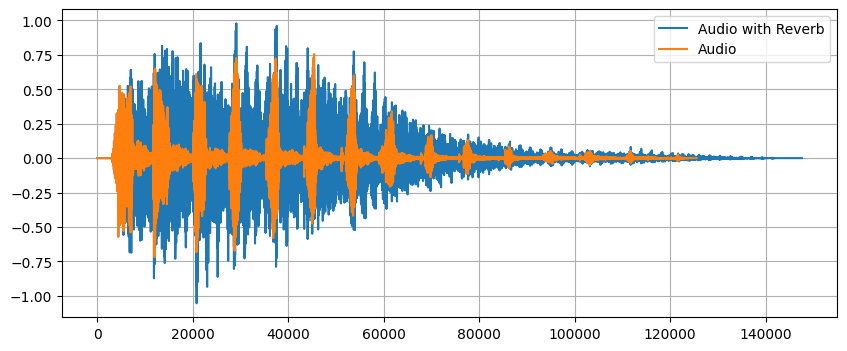

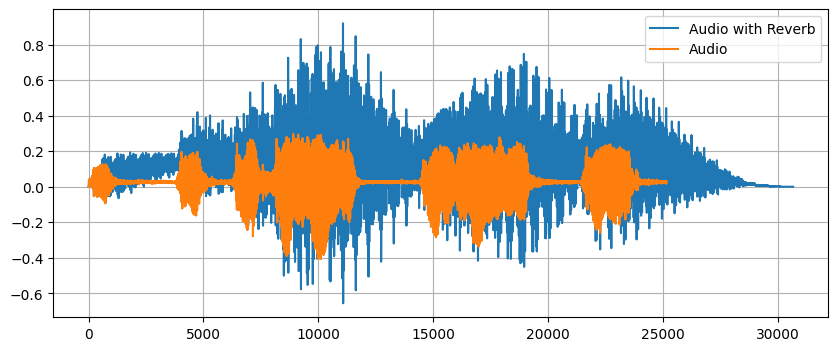

In [17]:
def reverb(audio, atraso=0.5):
    
    audio_, sample_rate = audio
    
    size = int(atraso * sample_rate)
    kernel = np.zeros(size)
    
    for idx in range(0, size, size//10):
        
        amplitude = (size - idx)/size
        kernel[idx] = amplitude

    reverb = np.convolve(audio_, kernel)
    audio_reverb = reverb, sample_rate

    plt.figure(figsize=(10, 4))
    plt.plot(audio_reverb[0], label="Audio with Reverb")
    plt.plot(audio[0], label="Audio")
    plt.legend()
    plt.grid()
    plt.show()


reverb(laugh, 0.5)
reverb(owl, 0.5)

# Compression with Fourier and High Frequencies using Fourier

In [19]:
def transform_image(original, p):
    """
    Transforms an image using Fourier transformation and compresses it by keeping only a fraction of the frequency components.

    Parameters:
    original (ndarray): The original image to be transformed.
    p (float): The fraction of frequency components to keep. Should be between 0 and 1.

    Returns:
    ndarray: The reconstructed image after compression.

    """
    original = original.copy()
    transformed_image = np.fft.fft2(original)
    shifted_transform = np.fft.fftshift(transformed_image)

    height, width = transformed_image.shape
    height_crop = int(height * p)
    width_crop = int(width * p)

    height_slice = slice(height // 2 - height_crop // 2, height // 2 + height_crop // 2)
    width_slice = slice(width // 2 - width_crop // 2, width // 2 + width_crop // 2)

    compressed_transform = np.zeros_like(shifted_transform)
    compressed_transform[height_slice, width_slice] = shifted_transform[height_slice, width_slice].copy()
    compressed_transform = np.fft.ifftshift(compressed_transform)

    reconstructed_image = np.fft.ifft2(compressed_transform)

    return reconstructed_image

Text(0.5, 1.0, 'Transformed Fruits (p=0.5)')

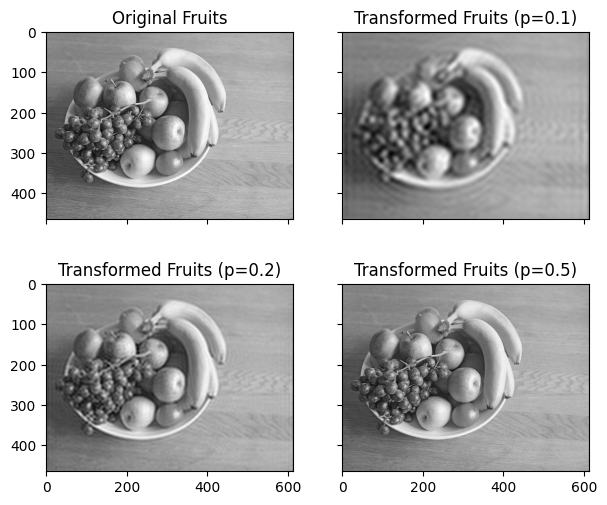

In [26]:
fruits = plt.imread("img/frutas.jpg")
fruits = fruits.mean(axis=-1)

# Apply the transform with different fractions
reconstructed_image1 = transform_image(fruits, 0.1)
reconstructed_image2 = transform_image(fruits, 0.2)
reconstructed_image5 = transform_image(fruits, 0.5)

# Plot the original and transformed images
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)

axes[0, 0].imshow(fruits, cmap="gray")
axes[0, 0].set_title('Original Fruits')

axes[0, 1].imshow(np.abs(reconstructed_image1), cmap="gray")
axes[0, 1].set_title('Transformed Fruits (p=0.1)')

axes[1, 0].imshow(np.abs(reconstructed_image2), cmap="gray")
axes[1, 0].set_title('Transformed Fruits (p=0.2)')

axes[1, 1].imshow(np.abs(reconstructed_image5), cmap="gray")
axes[1, 1].set_title('Transformed Fruits (p=0.5)')

When high frequencies are removed from an image, fine details and sharpness are significantly reduced, resulting in a smoothed or blurred image. If the proportion of low frequencies retained is very low, the image becomes extremely blurred and loses most of its structure and contrast, appearing as a smudge, as seen in the case where $p=0.1$

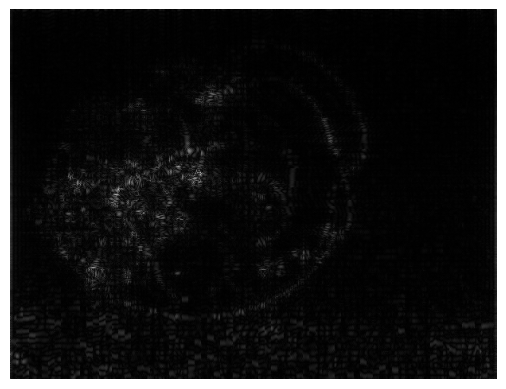

In [27]:
def filtro_passa_alta(original, p):
    
    original = original.copy()
    transformada_frutas = np.fft.fft2(original)
    transformada_centralizada = np.fft.fftshift(transformada_frutas)

    altura, largura = transformada_frutas.shape
    altura_recorte = int(altura * p)
    largura_recorte = int(largura * p)

    fatia_altura = slice(altura // 2 - altura_recorte // 2, altura // 2 + altura_recorte // 2)
    fatia_largura = slice(largura // 2 - largura_recorte // 2, largura // 2 + largura_recorte // 2)

    transformada_filtro_passa_alta = transformada_centralizada.copy()
    transformada_filtro_passa_alta[fatia_altura, fatia_largura] = 0
    transformada_filtro_passa_alta = np.fft.ifftshift(transformada_filtro_passa_alta)

    imagem_reconstruida = np.fft.ifft2(transformada_filtro_passa_alta)

    return np.abs(imagem_reconstruida)

reconstructed_image8 = filtro_passa_alta(fruits, 0.8)

plt.imshow(np.abs(reconstructed_image8), cmap="gray")
plt.grid(False)
plt.axis(False)
plt.show()

Applying a high-pass filter enhances the edges and fine details (contours) of the image, increasing contrast and edge sharpness, but overall structure and smoothness is lost, resulting in a noisier image.